In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('spotify_songs.csv', encoding='ISO-8859-1')

In [3]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
summary = {
    "Max": df["track_popularity"].max(),
    "Q3": df["track_popularity"].quantile(.75),
    "Median": df["track_popularity"].median(),
    "Q1": df["track_popularity"].quantile(.25),
    "Min": df["track_popularity"].min()
}
summary

{'Max': 100, 'Q3': 62.0, 'Median': 45.0, 'Q1': 24.0, 'Min': 0}

<AxesSubplot:xlabel='track_popularity', ylabel='Count'>

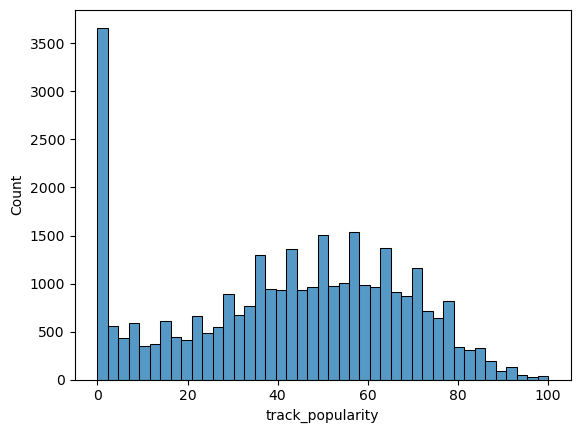

In [6]:
sns.histplot(data=df, x="track_popularity")

<AxesSubplot:xlabel='track_popularity'>

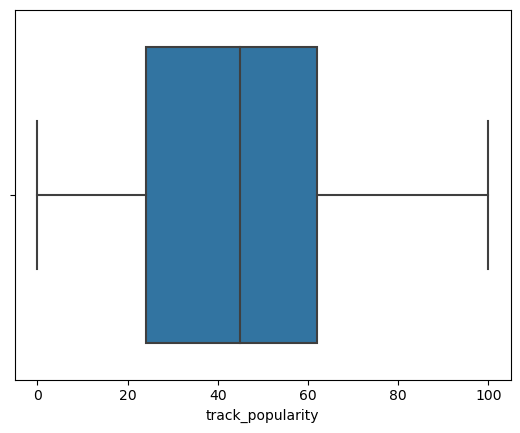

In [7]:
sns.boxplot(data=df, x="track_popularity")

# Track Popularity Summary
### This data is right skewed. Has a minimum of 0 and a maximum of 100. The distribution being close to symetrical and has a bell curve. The left of the data is a lot higher than the data due to popularity of certain songs. The median of this data is 45 mainly due to the amount of zeros in this dataframe.

In [8]:
def avg(col):
    average = col.mean()
    return average

In [9]:
avg(df["tempo"])

120.88113154448297

In [10]:
def stand(column):
    std = df[column].std()
    stand = df["danceability"]
    return stand
standan = stand("danceability")

<AxesSubplot:xlabel='danceability', ylabel='Count'>

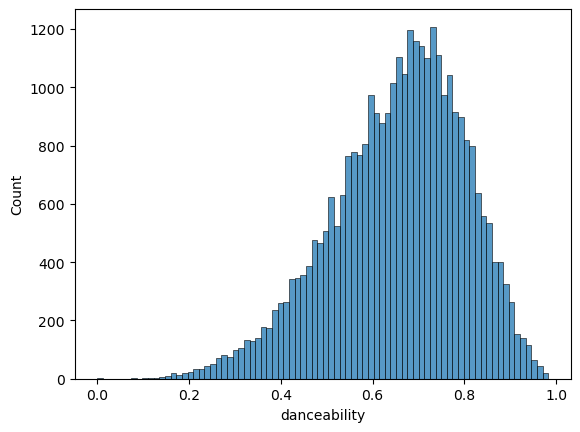

In [11]:
sns.histplot(data=df, x="danceability")

In [12]:
avdan=df["danceability"].mean()

In [13]:
print("A majority of songs fall within", (avdan+standan), "and", (avdan-standan))

A majority of songs fall within 0        1.40285
1        1.38085
2        1.32985
3        1.37285
4        1.30485
          ...   
32828    1.08285
32829    1.17685
32830    1.18385
32831    1.28085
32832    1.25785
Name: danceability, Length: 32833, dtype: float64 and 0       -0.09315
1       -0.07115
2       -0.02015
3       -0.06315
4        0.00485
          ...   
32828    0.22685
32829    0.13285
32830    0.12585
32831    0.02885
32832    0.05185
Name: danceability, Length: 32833, dtype: float64


In [14]:
idx = 0

for song in df["track_popularity"]:
    if song < 100:
        idx += 1
    elif song == 100:
         break
df.loc[idx]

track_id                                               2XU0oxnq2qxCpomAAuJY8K
track_name                                                       Dance Monkey
track_artist                                                      Tones and I
track_popularity                                                          100
track_album_id                                         0UywfDKYlyiu1b38DRrzYD
track_album_name                  Dance Monkey (Stripped Back) / Dance Monkey
track_album_release_date                                           2019-10-17
playlist_name               post-teen alternative, indie, pop (large variety)
playlist_id                                            1y42gwI5cuwjBslPyQNfqb
playlist_genre                                                            pop
playlist_subgenre                                               post-teen pop
danceability                                                            0.824
energy                                                          

# Analyzation of Dance Monkey by Tones and I
### This song has a track popularity of 100 and I find that pretty impressive no other songs in this data set have a score of 100. This song genres are post-teen alternative, indie, and pop. 

# what is the standard deviation of the songs energy?

In [15]:
summary1 = {
    "Max": df["energy"].max(),
    "Q3": df["energy"].quantile(.75),
    "Median": df["energy"].median(),
    "Q1": df["energy"].quantile(.25),
    "Min": df["energy"].min()
}
summary

{'Max': 100, 'Q3': 62.0, 'Median': 45.0, 'Q1': 24.0, 'Min': 0}

<AxesSubplot:xlabel='energy', ylabel='Count'>

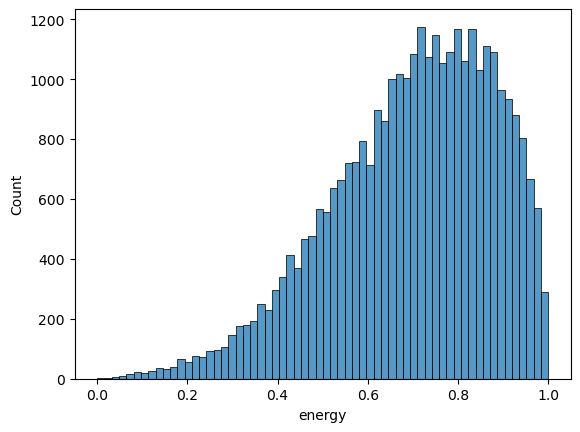

In [16]:
sns.histplot(data=df, x="energy")

In [17]:
def stand(column):
    std = df[column].std()
    stand = std
    return stand
staneng = stand("energy")
staneng

0.18091003391959035

In [18]:
aveng=df["energy"].mean()

up = str((aveng+staneng))
down = str((aveng-staneng))
up

'0.879529304622851'

In [19]:
print(df["energy"].mean())

0.6986192707032606


In [20]:
print("A majority of songs fall within", up, "and", down)

A majority of songs fall within 0.879529304622851 and 0.5177092367836702


# Energy Analyzing 
### The data is left skewed. Most of the data falls within 0.879 and 0.517.  The average of all this data is 0.698.

In [21]:
spop = 0
srap = 0
for song in df["playlist_genre"]:
    if song == "pop":
        spop += 1
    elif song == "rap":
        srap += 1
print(srap)
print(spop)

5746
5507


In [22]:
df_pop = df[df["playlist_genre"] == "pop"]
df_rap = df[df["playlist_genre"] == "rap"]

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

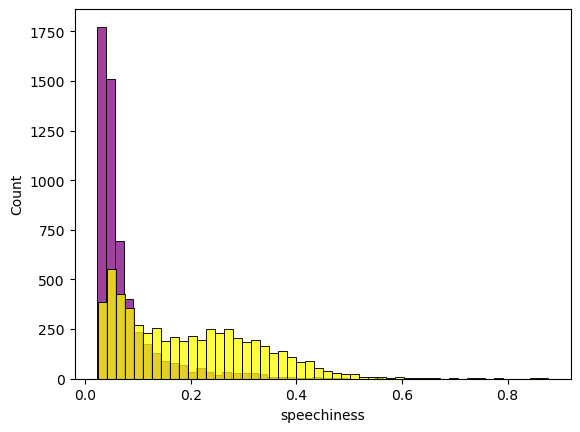

In [23]:
sns.histplot(data=df_pop, x="speechiness",bins=50,color="purple")
sns.histplot(data=df_rap, x="speechiness",bins=50,color="yellow")

In [24]:
pop_mean = df_pop["speechiness"].mean()
rap_mean = df_rap["speechiness"].mean()
print("Pop:", pop_mean, "Rap:", rap_mean)

Pop: 0.07399126566188474 Rap: 0.1975058823529417


# On average, rap music is more speechy than pop music. More detailed being that the average for rap is .197 and the pop average is 0.073.